NAME - Aarti Dhage  ROLL NO - 21102B0022
Github Link:

In [1]:
# Install necessary libraries
!pip install networkx
!pip install scikit-learn
!pip install matplotlib


In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score, silhouette_score


In [9]:
# Load the dataset from the file
file_path = '/content/facebook_combined.txt'

# Read the edge list and create a graph using NetworkX
G = nx.read_edgelist(file_path, nodetype=int)

# print(nx.info(G)) # This line caused the error
print(f"Name: {G.name}")
print(f"Type: {type(G)}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Name: 
Type: <class 'networkx.classes.graph.Graph'>
Number of nodes: 4039
Number of edges: 88234


In [10]:
# Get the adjacency matrix of the graph
adj_matrix = nx.to_numpy_array(G)
print("Adjacency Matrix Shape:", adj_matrix.shape)


Adjacency Matrix Shape: (4039, 4039)


In [11]:
# Apply Spectral Clustering
n_clusters = 5  # Choose the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(adj_matrix)

# Output cluster labels for each node
print("Cluster labels for nodes:", labels)


Cluster labels for nodes: [3 3 3 ... 4 4 4]


In [12]:
# Silhouette Score (requires pairwise distance matrix, here we use adjacency matrix)
silhouette_avg = silhouette_score(adj_matrix, labels, metric='precomputed')
print(f"Silhouette Score: {silhouette_avg}")

# If you have true labels for evaluation (optional, this part can be skipped)
# nmi_score = normalized_mutual_info_score(true_labels, labels)
# print(f"Normalized Mutual Information Score: {nmi_score}")


Silhouette Score: -1.0


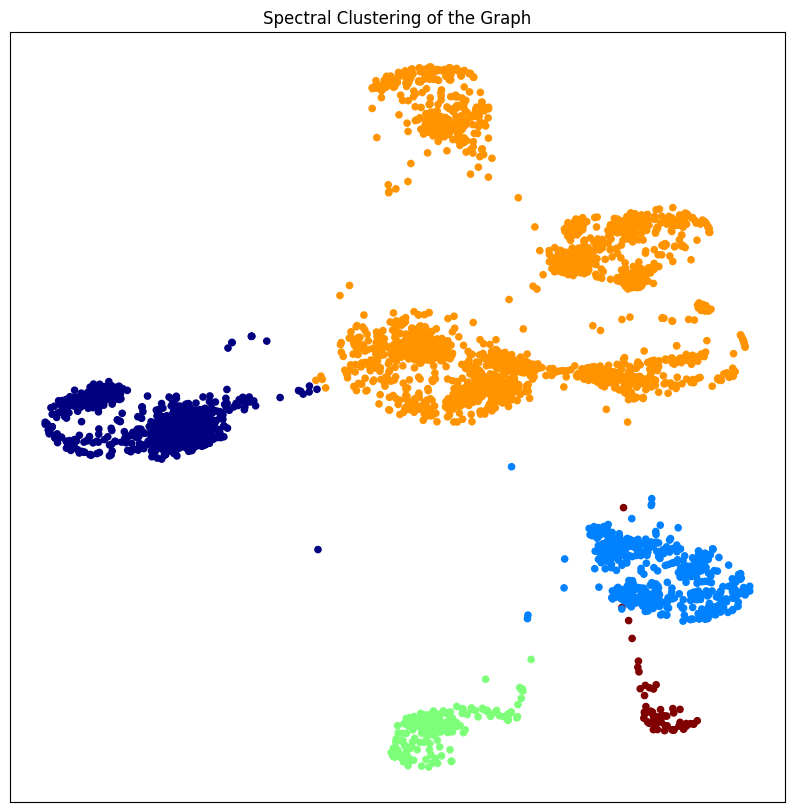

In [15]:
# Visualizing the graph with clusters
pos = nx.spring_layout(G, seed=42)  # For consistent layout across runs
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.jet, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title("Spectral Clustering of the Graph")
plt.show()
